In [1]:
import pandas as pd
import numpy as np
from os import path
import gtfparse
import pyensembl
pyensembl.EnsemblRelease(release=87)
import gspread
from  oauth2client.service_account  import ServiceAccountCredentials
import gspread
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from fish_helpers import *
fname = '/bigstore/binfo/mouse/Cornea/GSE115355_161227_170125_epi_stroma_gene_RPKM.xlsx'
RPKM = pd.read_excel(fname,index_col=0)
RPKM

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
Tissue,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,...,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma
Description,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_wounded_untreated,Epi_wounded_untreated,...,Stroma_control_MMC,Stroma_control_MMC,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC
Group,1,1,1,1,2,2,2,2,3,3,...,2,2,3,3,3,3,4,4,4,4
ID,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
0610005C13Rik,0.0353911,0.0199339,0.0670852,0.0354595,0.121699,0.0412891,0.018012,0.0414942,0.0208569,0,...,0.0304248,0.0505636,0.163281,0.0166548,0,0,0.0692133,0,0,0.0857614
0610007P14Rik,38.0668,39.1071,28.4881,30.8212,37.1201,34.2854,38.1678,29.5447,51.0487,38.9366,...,31.4287,46.1519,40.9497,44.1225,18.7655,34.7092,33.2747,41.7401,39.9045,30.2558
0610009B22Rik,26.1133,42.8366,29.2011,25.879,28.8057,24.5347,32.6269,18.5469,24.6162,17.6262,...,35.7014,35.8211,40.2175,27.1289,36.108,37.951,28.6589,30.4305,29.8874,29.9761
0610009L18Rik,0.898098,0.578114,1.24639,0.73915,0.94539,0.710986,0.652973,0.338456,0.529273,0.153531,...,1.46142,1.64973,1.03587,1.35848,4.16195,1.22101,0.909557,0.802346,3.30115,1.95869
0610009O20Rik,9.72072,9.48905,12.2571,11.9567,10.9457,12.2847,10.4238,12.2683,9.79277,8.92444,...,14.2817,13.756,11.363,13.2281,11.8876,12.3818,12.581,13.8603,17.2885,14.0716


In [2]:
scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']
# Path to .json
path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/ProbeDesign-92ebdb6a17a7.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
# Start with a gene list 
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df

INFO:oauth2client.client:Refreshing access_token


,Barcode,Component,Description,FPKM,GO,Gene,Gene_ID,Isoform %,Length,Oligos,Pathway,Transcript_ID,Unwounded FPKM,Wounded FPKM,Zscore
0,,,Ly6/Plaur domain containing 5 [Source:MGI Symb...,1.854759,,Lypd5,ENSMUSG00000030484,0,2239,,,ENSMUST00000032683,3.689392,0.020126,105.261700
1,,,fos-like antigen 1 [Source:MGI Symbol;Acc:MGI:...,1.773379,,Fosl1,ENSMUSG00000024912,1,1707,,,ENSMUST00000025850,3.515398,0.031360,84.540001
2,,,matrix metallopeptidase 13 [Source:MGI Symbol;...,2.395839,,Mmp13,ENSMUSG00000050578,1,2673,,,ENSMUST00000015394,4.716082,0.075595,325.822400
3,,,high mobility group AT-hook 2 [Source:MGI Symb...,2.551022,,Hmga2,ENSMUSG00000056758,0.999977,3710,,,ENSMUST00000072777,5.004995,0.097049,220.511716
4,,,pro-platelet basic protein [Source:MGI Symbol;...,5.997776,,Ppbp,ENSMUSG00000029372,1,1083,,,ENSMUST00000031319,11.846177,0.149375,84.176201
5,,,four and a half LIM domains 2 [Source:MGI Symb...,1.866092,,Fhl2,ENSMUSG00000008136,0.497168,1563,,,ENSMUST00000008280,3.574438,0.157746,48.710789
6,,,"fatty acid binding protein 4, adipocyte [Sourc...",2.403498,,Fabp4,ENSMUSG00000062515,0.980847,896,,,ENSMUST00000029041,4.649050,0.157946,29.097878
7,,,adenylate kinase 4 [Source:MGI Symbol;Acc:MGI:...,1.155918,,Ak4,ENSMUSG00000028527,0.647511,4360,,,ENSMUST00000106946,2.152343,0.159493,50.644569
8,,,small proline-rich protein 2G [Source:MGI Symb...,1.221699,,Sprr2g,ENSMUSG00000046203,0,651,,,ENSMUST00000056590,2.283212,0.160186,28.719985
9,,,nerve growth factor [Source:MGI Symbol;Acc:MGI...,3.101843,,Ngf,ENSMUSG00000027859,0.999373,1120,,,ENSMUST00000198644,6.041475,0.162210,81.503061


In [15]:
Samples = RPKM.iloc[:4]
Expression = RPKM.iloc[4:]
Stroma_col = [i for i in Samples.columns if 'Stroma' in Samples[i].loc['Description']]
Wounded_col = [i for i in Samples.columns if 'wounded' in Samples[i].loc['Description']]
untreated_col = [i for i in Samples.columns if 'untreate' in Samples[i].loc['Description']]
wounded_droppers = []
unwounded_droppers = []
untreated_Stroma_droppers = []
for i in Samples.columns:
    if not i in Stroma_col:
        wounded_droppers.append(i)
        unwounded_droppers.append(i)
        untreated_Stroma_droppers.append(i)
    elif not i in untreated_col:
        wounded_droppers.append(i)
        unwounded_droppers.append(i)
        untreated_Stroma_droppers.append(i)
    elif not i in Wounded_col:
        wounded_droppers.append(i)
    else:
        unwounded_droppers.append(i)
untreated_Stroma_RPKM = Expression.drop(columns=untreated_Stroma_droppers)
wounded_untreated_Stroma_RPKM = Expression.drop(columns=wounded_droppers)
unwounded_untreated_Stroma_RPKM = Expression.drop(columns=unwounded_droppers)

In [23]:
untreated_Stroma_RPKM = untreated_Stroma_RPKM[np.mean(untreated_Stroma_RPKM,axis=1)>1]
untreated_Stroma_RPKM

,s033,s035,s037,s039,s034,s036,s038,s040
Sample ID,,,,,,,,
0610007P14Rik,26.3044,33.8223,14.7528,38.537,40.9497,44.1225,18.7655,34.7092
0610009B22Rik,33.5915,38.853,15.5042,30.9548,40.2175,27.1289,36.108,37.951
0610009L18Rik,3.068,0.557217,0.713992,0.804812,1.03587,1.35848,4.16195,1.22101
0610009O20Rik,12.8818,10.6268,9.73184,12.7097,11.363,13.2281,11.8876,12.3818
0610010F05Rik,2.35093,2.17726,1.47676,1.34149,1.37733,2.27038,1.2009,2.14362
0610010K14Rik,25.4407,24.7827,21.5952,33.5673,51.3179,32.3998,70.6667,37.706
0610011F06Rik,26.1411,13.4962,14.0781,19.2246,22.1378,15.8986,25.6639,20.2622
0610012G03Rik,15.9605,10.8264,11.2275,11.382,18.1815,10.7403,38.0573,20.088
0610030E20Rik,4.24537,6.6956,5.79754,4.81505,3.94721,3.94424,5.54687,3.62341


In [24]:
untreated_Stroma_RPKM = untreated_Stroma_RPKM[(np.mean(untreated_Stroma_RPKM,axis=1)>1)&(np.mean(untreated_Stroma_RPKM,axis=1)<500)]
wounded_untreated_Stroma_RPKM = wounded_untreated_Stroma_RPKM.loc[untreated_Stroma_RPKM.index]
unwounded_untreated_Stroma_RPKM = unwounded_untreated_Stroma_RPKM.loc[untreated_Stroma_RPKM.index]

In [25]:
Zscore_untreated_Stroma_RPKM = (np.mean(wounded_untreated_Stroma_RPKM,axis=1)-np.mean(unwounded_untreated_Stroma_RPKM,axis=1))/np.std(unwounded_untreated_Stroma_RPKM,axis=1)
abs_Zscore_untreated_Stroma_RPKM = np.abs(Zscore_untreated_Stroma_RPKM).sort_values()
abs_Zscore_untreated_Stroma_RPKM.iloc[-100:]

Sample ID
Arhgef39          15.109162
Mapre2            15.129739
Zfp462            15.248369
Zfp629            15.411939
Fkbpl             15.535244
Ndufv3            15.620267
Cda               15.725795
Psmg3             15.782575
2700094K13Rik     15.867250
Klk11             15.899155
Gpx2              15.901373
Snrpd2            15.906601
Nelfe             15.912435
Cenpa             16.007343
Il1b              16.243326
Pdap1             16.353050
Foxm1             16.511184
Zfp106            16.570286
Atp5e             16.620547
H2-T9             16.912526
Nf1               16.964435
Tm4sf1            17.272330
Ms4a4c            17.301739
Zfp866            17.314277
2210408F21Rik     17.563401
Mir678            17.589175
Nat9              17.616055
BC117090          17.632625
Mrps21            17.674917
Ldha              17.799977
                    ...    
Hist1h2ap         29.695942
Sbsn              30.866773
Lsm2              32.038714
Pmf1              34.524174
D17H6S56E-

In [26]:
Fold_untreated_Stroma_RPKM = (np.mean(wounded_untreated_Stroma_RPKM,axis=1)/np.mean(unwounded_untreated_Stroma_RPKM,axis=1))
abs_Fold_untreated_Stroma_RPKM = np.abs(Fold_untreated_Stroma_RPKM).sort_values()
abs_Fold_untreated_Stroma_RPKM.iloc[-100:]

Sample ID
Mir8097            5.006201
Cdca5              5.011937
Ccl12              5.030679
Gip                5.136754
Birc5              5.168907
Esco2              5.203950
Areg               5.222173
Scgb2b2            5.225203
Bub1               5.230308
Lrr1               5.271032
Tk1                5.280034
Gch1               5.302699
Pbk                5.318414
Crabp2             5.427692
S100a2             5.428567
Mxd3               5.466317
Ccr2               5.539209
Pttg1              5.626752
Coro1a             5.659164
Depdc1a            5.701396
Serpinb3a          5.734700
Gipc2              5.748231
Ins2               5.766619
Tuba1c             5.770117
Cenpa              5.808550
Igfbp3             5.883803
Barx2              5.922770
Aurkb              6.014316
2810417H13Rik      6.105166
Ly6a               6.137223
                    ...    
Ly6d              15.752710
Lilrb4a           19.132253
Mir678            20.136932
Lilr4b            20.503947
Lcn2      

In [46]:
len(list(set(abs_Fold_untreated_Stroma_RPKM.iloc[-50:].index).intersection(abs_Zscore_untreated_Stroma_RPKM.iloc[-50:].index)))

35

In [28]:
n = 100
keepers = list(set(Fold_untreated_Stroma_RPKM.iloc[-n:].index).intersection(Zscore_untreated_Stroma_RPKM.iloc[-n:].index))
for i in keepers:
    print(i)
    print('wounded:',np.mean(wounded_untreated_Stroma_RPKM.loc[i]))
    print('unwounded:',np.mean(unwounded_untreated_Stroma_RPKM.loc[i]))
    print('fold:',np.mean(Fold_untreated_Stroma_RPKM.loc[i]))
    print('Z:',np.mean(Zscore_untreated_Stroma_RPKM.loc[i]))
    print('')

Zfp958
wounded: 4.596935
unwounded: 3.87434
fold: 1.1865078955383368
Z: 0.4137525222670266

Znhit2
wounded: 19.42965
unwounded: 12.0998075
fold: 1.6057817448748666
Z: 4.152717975588596

Zwint
wounded: 30.626525
unwounded: 23.587874999999997
fold: 1.2984011912900169
Z: 1.4744807557190291

Znhit1
wounded: 37.486325
unwounded: 20.46455
fold: 1.8317688392854963
Z: 10.307241736548846

Zfr2
wounded: 1.16961925
unwounded: 2.2515875
fold: 0.5194642668783692
Z: -1.6264631205477946

Zfyve21
wounded: 11.0532175
unwounded: 9.881525
fold: 1.1185740561300002
Z: 0.3157259789672846

Zyx
wounded: 12.979075000000002
unwounded: 10.2716925
fold: 1.263577058990035
Z: 1.1729167086740664

Zmat1
wounded: 1.4258647500000001
unwounded: 2.516435
fold: 0.5666209339800155
Z: -0.8372547130580663

Zscan12
wounded: 1.3631600000000001
unwounded: 1.4889200000000002
fold: 0.9155360932756629
Z: -0.5412493016992576

Zfx
wounded: 3.6458700000000004
unwounded: 4.89574
fold: 0.7447025373079453
Z: -0.7794807048003684

Zfp959


In [68]:
deg_keepers = []
master_std = np.std(unwounded_untreated_Stroma_RPKM,axis=1)+np.std(wounded_untreated_Stroma_RPKM,axis=1)
avg_untreated_Stroma_RPKM = np.mean(untreated_Stroma_RPKM,axis=1)
for gene in untreated_Stroma_RPKM.index:
    if avg_untreated_Stroma_RPKM.loc[gene]<1:
        continue
    if avg_untreated_Stroma_RPKM.loc[gene]>100:
        continue
    if master_std.loc[gene]>2:
        continue
    if abs_Fold_untreated_Stroma_RPKM.loc[gene]<2:
        continue
    if abs_Zscore_untreated_Stroma_RPKM.loc[gene]<10:
        continue
    deg_keepers.append(gene)
print(len(deg_keepers))

45


45


<Figure size 720x720 with 0 Axes>

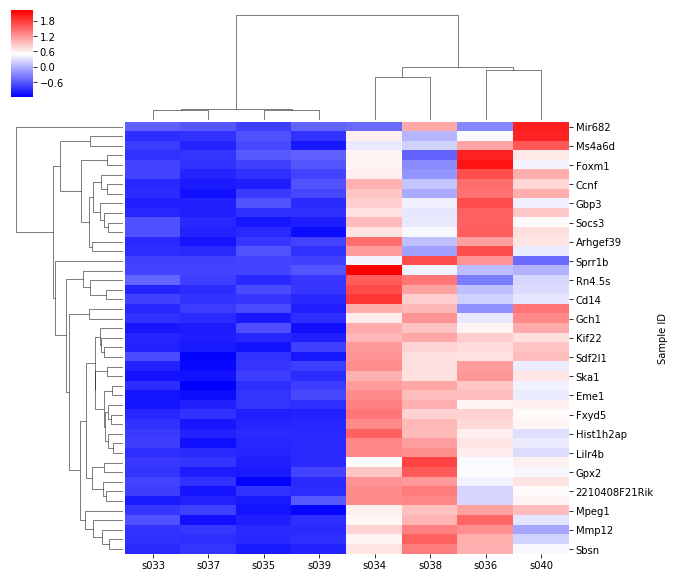

In [69]:
import seaborn as sns
from random import sample 
# n=1000
# keepers = list(set(Fold_untreated_Stroma_RPKM.iloc[-n:].index).intersection(Zscore_untreated_Epi_RPKM.iloc[-n:].index))
# deg_keepers = list(Zscore_untreated_Stroma_RPKM[abs_Zscore_untreated_Stroma_RPKM>10].index)
# keepers = sample(list(Zscore_untreated_Stroma_RPKM[Zscore_untreated_Stroma_RPKM>10].index),500)
print(len(deg_keepers))
temp_df = untreated_Stroma_RPKM.loc[deg_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(temp_df,cmap='bwr',z_score=0)
plt.show()

45


<Figure size 720x720 with 0 Axes>

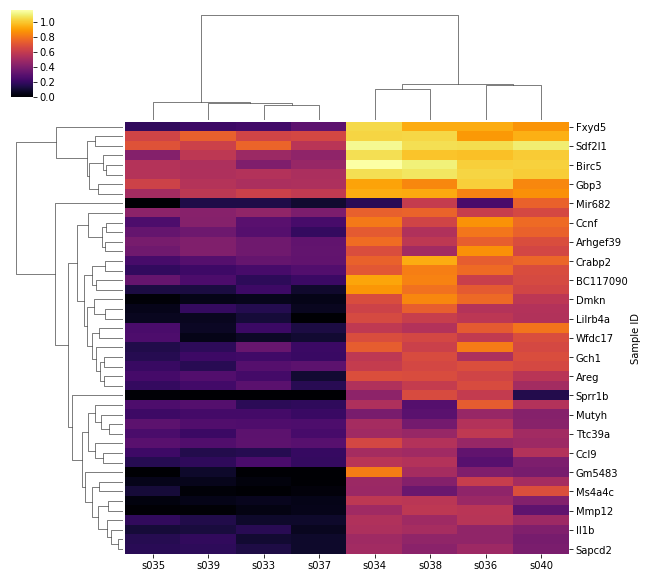

In [75]:
import seaborn as sns
from random import sample 
# n=1000
# keepers = list(set(Fold_untreated_Stroma_RPKM.iloc[-n:].index).intersection(Zscore_untreated_Stroma_RPKM.iloc[-n:].index))
#deg_keepers = list(Zscore_untreated_Stroma_RPKM[abs_Zscore_untreated_Stroma_RPKM>10].index)
# keepers = sample(list(Zscore_untreated_Stroma_RPKM[Zscore_untreated_Stroma_RPKM>10].index),500)
print(len(deg_keepers))
temp_df = untreated_Stroma_RPKM.loc[deg_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df+1),cmap='inferno')
plt.show()

In [71]:
control_keepers = []
master_std = np.std(unwounded_untreated_Stroma_RPKM,axis=1)+np.std(wounded_untreated_Stroma_RPKM,axis=1)
avg_untreated_Stroma_RPKM = np.mean(untreated_Stroma_RPKM,axis=1)
for gene in untreated_Stroma_RPKM.index:
    if avg_untreated_Stroma_RPKM.loc[gene]<1:
        continue
    if avg_untreated_Stroma_RPKM.loc[gene]>100:
        continue
    if master_std.loc[gene]>2:
        continue
    if abs_Fold_untreated_Stroma_RPKM.loc[gene]>2:
        continue
    if abs_Zscore_untreated_Stroma_RPKM.loc[gene]>0.2:
        continue
    control_keepers.append(gene)
print(len(control_keepers))

370


370


<Figure size 720x720 with 0 Axes>

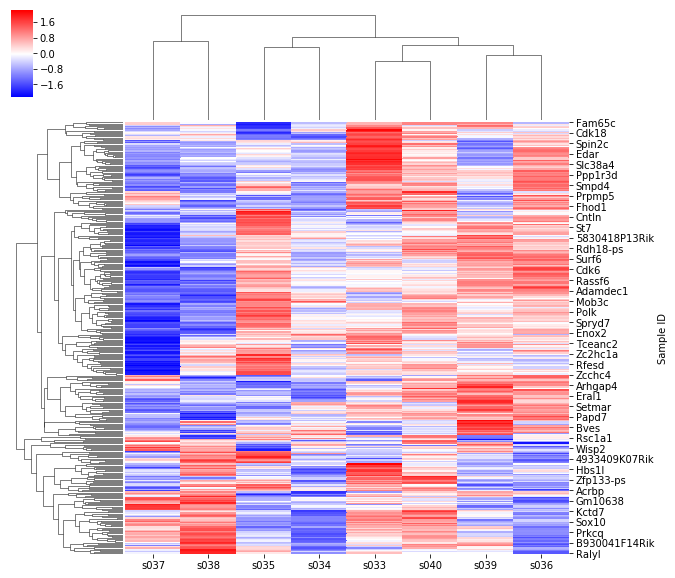

In [74]:
import seaborn as sns
from random import sample 
# n=1000
# keepers = list(set(Fold_untreated_Stroma_RPKM.iloc[-n:].index).intersection(Zscore_untreated_Epi_RPKM.iloc[-n:].index))
# Zscore_untreated_Stroma_RPKM = (np.mean(wounded_untreated_Stroma_RPKM,axis=1)-np.mean(unwounded_untreated_Stroma_RPKM,axis=1))/np.std(unwounded_untreated_Stroma_RPKM,axis=1)
# abs_Zscore_untreated_Stroma_RPKM = np.abs(Zscore_untreated_Stroma_RPKM).sort_values()
# abs_Zscore_untreated_Stroma_RPKM.iloc[-100:]
# control_keepers = list(Zscore_untreated_Stroma_RPKM[abs_Zscore_untreated_Stroma_RPKM<0.2].index)
# keepers = sample(list(Zscore_untreated_Epi_RPKM[Zscore_untreated_Epi_RPKM>10].index),500)
print(len(control_keepers))
temp_df = untreated_Stroma_RPKM.loc[control_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df+1),cmap='bwr',z_score=0)
plt.show()

370


<Figure size 720x720 with 0 Axes>

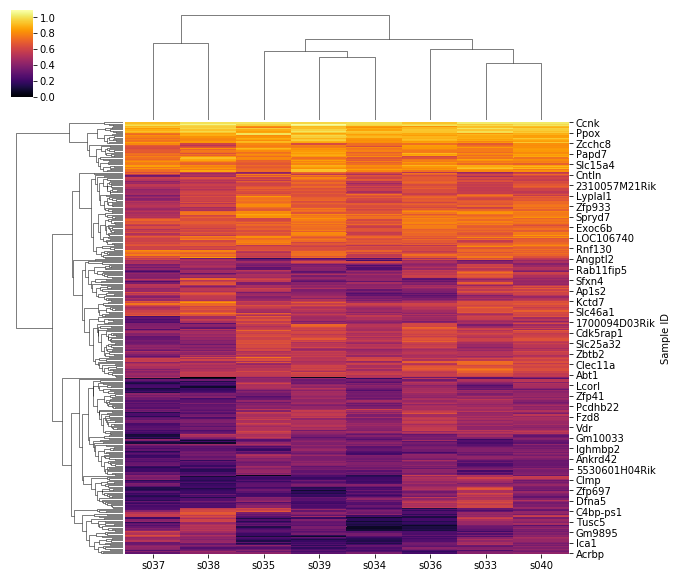

In [79]:
keepers = []
avg_untreated_Stroma_RPKM = np.mean(untreated_Stroma_RPKM,axis=1)
# for gene in untreated_Stroma_RPKM.index:
#     if avg_untreated_Stroma_RPKM.loc[gene]>5:
#         if avg_untreated_Stroma_RPKM.loc[gene]<50:
#             keepers.append(gene)
# control_keepers = untreated_Stroma_RPKM.loc[keepers][np.std(untreated_Stroma_RPKM,axis=1)<0.5].index
print(len(control_keepers))
temp_df = untreated_Stroma_RPKM.loc[control_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df+1),cmap='inferno')
plt.show()

In [78]:
gene = control_keepers[1]
print(gene,':',Zscore_untreated_Stroma_RPKM.loc[gene])
print(gene,':',Fold_untreated_Stroma_RPKM.loc[gene])
gene = deg_keepers[1]
print(gene,':',Zscore_untreated_Stroma_RPKM.loc[gene])
print(gene,':',Fold_untreated_Stroma_RPKM.loc[gene])

1110051M20Rik : -0.18963073803591413
1110051M20Rik : 0.9756964351692593
Areg : 11.697351678662928
Areg : 5.222172909029382


In [35]:
Zscore_untreated_Stroma_RPKM = (np.mean(wounded_untreated_Stroma_RPKM,axis=1)-np.mean(unwounded_untreated_Stroma_RPKM,axis=1))/np.std(unwounded_untreated_Stroma_RPKM,axis=1)
avg_untreated_Stroma_RPKM = np.mean(untreated_Stroma_RPKM,axis=1)
keepers = []
for gene in Zscore_untreated_Stroma_RPKM.index:
    if avg_untreated_Stroma_RPKM.loc[gene]>1:
        if avg_untreated_Stroma_RPKM.loc[gene]<100:
            keepers.append(gene)
Zscore_untreated_Stroma_RPKM = Zscore_untreated_Stroma_RPKM.loc[wounded_untreated_Stroma_RPKM[(np.mean(wounded_untreated_Stroma_RPKM,axis=1)>10)].index]
Zscore_untreated_Stroma_RPKM = Zscore_untreated_Stroma_RPKM.loc[keepers]
abs_Zscore_untreated_Stroma_RPKM = np.abs(Zscore_untreated_Stroma_RPKM).sort_values()
control_keepers = list(Zscore_untreated_Stroma_RPKM[abs_Zscore_untreated_Stroma_RPKM<0.1].index)
deg_keepers = list(Zscore_untreated_Stroma_RPKM[abs_Zscore_untreated_Stroma_RPKM>10].index)
print('control genes:',len(control_keepers))
print('deg genes:',len(deg_keepers))

control genes: 296
deg genes: 104


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


In [36]:
gene = deg_keepers[0]
print(gene,':',Zscore_untreated_Stroma_RPKM.loc[gene])
print(gene,':',Zscore_untreated_Stroma_RPKM.loc[gene])
untreated_Stroma_RPKM.loc[gene]

1810009A15Rik : 12.706810168690888
1810009A15Rik : 12.706810168690888


s033    9.42108
s035     13.352
s037     3.7197
s039     15.263
s034    53.7782
s036    32.1476
s038    137.351
s040    42.8421
Name: 1810009A15Rik, dtype: object

In [38]:
FPKM_mean_df = np.mean(untreated_Stroma_RPKM,axis=1)
FPKM_wounded_df = np.mean(wounded_untreated_Stroma_RPKM,axis=1)
FPKM_unwounded_df = np.mean(unwounded_untreated_Stroma_RPKM,axis=1)
Zscore_untreated_Stroma_RPKM = (np.mean(wounded_untreated_Stroma_RPKM,axis=1)-np.mean(unwounded_untreated_Stroma_RPKM,axis=1))/np.std(unwounded_untreated_Stroma_RPKM,axis=1)


In [39]:
Gene_Names = expression_worksheet.range('A2:A'+str(len(keepers)+1))
FPKM = expression_worksheet.range('C2:C'+str(len(keepers)+1))
FPKM_unwounded = expression_worksheet.range('M2:M'+str(len(keepers)+1))
FPKM_wounded = expression_worksheet.range('N2:N'+str(len(keepers)+1))
Zscore = expression_worksheet.range('O2:O'+str(len(keepers)+1))
for i,gene in enumerate(keepers):
    Gene_Names[i].value = gene
    FPKM[i].value = FPKM_mean_df.loc[gene]
    FPKM_unwounded[i].value = FPKM_wounded_df.loc[gene]
    FPKM_wounded[i].value = FPKM_unwounded_df.loc[gene]
    Zscore[i].value = Zscore_untreated_Stroma_RPKM.loc[gene]
expression_worksheet.update_cells(Gene_Names)
expression_worksheet.update_cells(FPKM)
expression_worksheet.update_cells(FPKM_unwounded)
expression_worksheet.update_cells(FPKM_wounded)
expression_worksheet.update_cells(Zscore)

{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!O2:O11994',
 'updatedRows': 11993,
 'updatedColumns': 1,
 'updatedCells': 11993}

In [163]:
biomart_download_fname_path = '/bigstore/binfo/mouse/mouse_mart_export.txt'
expression_path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/MERFISH_analysis-master/mouse/Zach/Cornea/Expression/no_versions_isoforms_tracking.csv'
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
FPKM_df = pd.read_csv(open(expression_path, 'r'))
transcript_df = pd.read_csv(open(biomart_download_fname_path, 'r'))
Transcript_IDs = expression_worksheet.range('G2:G'+str(len(expression_df)+1))
Gene_IDs = expression_worksheet.range('F2:F'+str(len(expression_df)+1))
FPKMs = expression_worksheet.range('C2:C'+str(len(expression_df)+1))
lengths = expression_worksheet.range('D2:D'+str(len(expression_df)+1))
Descriptions = expression_worksheet.range('B2:B'+str(len(expression_df)+1))
Genes = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
Isoforms = expression_worksheet.range('I2:I'+str(len(expression_df)+1))
Type = expression_worksheet.range('J2:J'+str(len(expression_df)+1))

flag = 'gene'
FPKM_gene_name_col = 'gene_short_name'
FPKM_gid_col = 'gene_id'
FPKM_tid_col = 'transcript_id'
FPKM_length_col = 'length'
FPKM_FPKM_col = 'FPKM'
tid_col = 'Transcript stable ID'
gid_col = 'Gene stable ID'
ttype_col = 'Transcript type'
gene_name_col = 'Gene name'
gene_description_col = 'Gene description'

completed = []
for i,cell in enumerate(Genes):
    gene = cell.value
    if gene == '':
        continue
    if gene in completed:
        Type[i].value= 'duplicate'
        print(gene,' duplicated')
    if flag=='gene':
        gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene][FPKM_gid_col].unique()
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.capitalize()][FPKM_gid_col].unique()
        except:
            pass
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.upper()][FPKM_gid_col].unique()
        except:
            pass
    elif flag == 'gid':
        gid = gene
    elif flag == 'tid':
        gid = FPKM_df[FPKM_df[FPKM_tid_col] == gene.split('.')[0]][FPKM_gid_col].unique()
        master_tid = gene.split('.')[0]
    else:
        print('flag is wrong')
    if isinstance(gid,list):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    elif isinstance(gid,np.ndarray):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    else:
        print('gid not found for ',gene)
        continue
    gene_FPKM_df = FPKM_df[FPKM_df[FPKM_gid_col] == gid].drop_duplicates(FPKM_tid_col)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_length_col, ascending=False)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_FPKM_col, ascending=False)
    if len(gene_FPKM_df)==0:
        print('Failed finding: ', gid)
        continue
    tids = [i for i in gene_FPKM_df[FPKM_tid_col] if i != '']
    transcripts = transcript_df[transcript_df[tid_col].isin(tids)]
    transcripts = transcripts[transcripts[ttype_col]=='protein_coding']
    expression = []
    length = []
    for tid in transcripts[tid_col]:
        expression.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0])
        length.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_length_col].iloc[0])
    transcripts[FPKM_FPKM_col]=expression
    transcripts[FPKM_length_col]=length
    transcripts = transcripts.sort_values(FPKM_FPKM_col, ascending=False)
#         tsls = ['tsl1','tsl2','tsl3']
#         final_transcripts = transcripts[transcripts['Transcript support level (TSL)'].isin(tsls)]
#         if len(final_transcripts)>0:
#             transcripts = final_transcripts
    if flag =='tid':
        transcripts = transcripts[transcripts[tid_col]==master_tid]
    if len(transcripts)==0:
        print('Failed finding ', gene)
        continue
    tid = str(transcripts[tid_col].iloc[0])
    Transcript_IDs[i].value = tid
    Gene_IDs[i].value = str(transcripts[gid_col].iloc[0])
    fpkm = transcripts[FPKM_FPKM_col].iloc[0]
    FPKMs[i].value = transcripts[FPKM_FPKM_col].iloc[0]
    lengths[i].value = int(transcripts[FPKM_length_col].iloc[0])
    Descriptions[i].value = str(transcripts[gene_description_col].iloc[0])
    Genes[i].value = str(transcripts[gene_name_col].iloc[0])
    I = gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0]/np.sum(gene_FPKM_df[FPKM_FPKM_col])
    if fpkm==0:
        I = 0
    Isoforms[i].value = I
    completed.append(gene)
expression_worksheet.update_cells(Transcript_IDs)
# expression_worksheet.update_cells(FPKMs)
expression_worksheet.update_cells(lengths)
expression_worksheet.update_cells(Descriptions)
#expression_worksheet.update_cells(Genes)
expression_worksheet.update_cells(Gene_IDs)
expression_worksheet.update_cells(Isoforms)
expression_worksheet.update_cells(Type)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars


gid not found for  Hn1l []
gid not found for  Nup133 []
Failed finding  Serpina3h
gid not found for  Slc7a5 []
gid not found for  BC037156 []
Failed finding  Fam120aos
gid not found for  9330162012Rik []
gid not found for  C330022C24Rik []
gid not found for  Ccdc109b []
gid not found for  1600014C10Rik []
Failed finding  H19
gid not found for  3110039I08Rik []
gid not found for  AI506816 []
gid not found for  Gm38416 []
gid not found for  D17H6S56E-5 []
gid not found for  Cdt1 []
Failed finding  Cep83os
gid not found for  A130010J15Rik []
gid not found for  Gm5416 []


{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!J2:J633',
 'updatedRows': 632,
 'updatedColumns': 1,
 'updatedCells': 632}

In [166]:
# readout_names = ['1009169.0','458122.0','218057.0','275708.0','756916.0',
#                  '638557.0','285692.0','719418.0','516032.0','432678.0',
#                  '135628.0','184948.0','471571.0','942696.0','1074935.0',
#                  '760360.0','1095367.0','428400.0','655176.0','202915.0']
readout_names = ['RS0095_cy5','RS0109_cy5','RS0175_cy5','RS0237_cy5','RS0307_cy5',
                 'RS0332_cy5','RS0384_atto565','RS0406_atto565','RS0451_atto565',
                 'RS0468_atto565','RS0548_atto565','RS64.0_atto565','RSN9927.0_cy5',
                 'RSN2336.0_cy5','RSN1807.0_cy5','RSN4287.0_atto565','RSN1252.0_atto565',
                 'RSN9535.0_atto565']
def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([str(row[0]), str(row[1]), str(row[2])+'\n']))
# Generate Codebook
row_tuples = []
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
for idx, row in expression_df.drop_duplicates('Transcript_ID').iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
        #row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str(row['Barcode']).zfill(18)))
        row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str('111000000000000001').zfill(18)))
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Epithelium'
if not os.path.exists(base):
    os.mkdir(base)
write_codebook(row_tuples, os.path.join(base,'Codebook1.txt'), readout_names)
row_tuples

[('Galm', 'ENSMUST00000039205', '111000000000000001'),
 ('Folr2', 'ENSMUST00000094141', '111000000000000001'),
 ('Elk3', 'ENSMUST00000008542', '111000000000000001'),
 ('Vit', 'ENSMUST00000024880', '111000000000000001'),
 ('Psmd11', 'ENSMUST00000173797', '111000000000000001'),
 ('Acsl3', 'ENSMUST00000134566', '111000000000000001'),
 ('Tmem30b', 'ENSMUST00000042975', '111000000000000001'),
 ('Fbxw17', 'ENSMUST00000046974', '111000000000000001'),
 ('G3bp1', 'ENSMUST00000018727', '111000000000000001'),
 ('Hlf', 'ENSMUST00000004051', '111000000000000001'),
 ('Atg14', 'ENSMUST00000042988', '111000000000000001'),
 ('Ccne1', 'ENSMUST00000108023', '111000000000000001'),
 ('Tmie', 'ENSMUST00000050958', '111000000000000001'),
 ('Socs7', 'ENSMUST00000045540', '111000000000000001'),
 ('Kif18b', 'ENSMUST00000021311', '111000000000000001'),
 ('Pfkl', 'ENSMUST00000020522', '111000000000000001'),
 ('Tbpl1', 'ENSMUST00000095794', '111000000000000001'),
 ('Aaas', 'ENSMUST00000230239', '111000000000000001

In [164]:
# Parse Fasta
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Epithelium'
f = os.path.join(base,'First_Pass','Epithelium_oligos.fasta')
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    gid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
        for i in name:
            if 'ENS' in i:
                gene.append(i.split('_')[0])
                gid.append(i.split('_')[2])
fasta = pd.DataFrame(columns = ['gene','gene_ID','sequence'])
fasta['gene'] = gene
fasta['gene_ID'] = gid
fasta['sequence'] = seqs
fasta

18

In [ ]:
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)

gene_name = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
oligos = expression_worksheet.range('E2:E'+str(len(expression_df)+1))
for i,gene in enumerate(gene_name):
    gene = gene.value
    if len(gene)>0:
        oligos[i].value = len(fasta[fasta['gene']==gene])
expression_worksheet.update_cells(oligos)